##  Import the required packages 

In [13]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Concepts in Transportation Science

In transportation science, various elements of a transportation system can be represented using the concepts of nodes and links. Here's a detailed explanation:

#### Nodes
- **Definition**: Nodes represent specific points or objects within a transportation network.
- **Examples**:
  - **State**: Each state can be considered a node within a national transportation network.
  - **Facility**: Facilities such as warehouses, distribution centers, and ports.
  - **Intersection**: Points where roads or paths cross, including traffic intersections.
  - **Area**: Larger geographical areas such as cities, neighborhoods, or regions.
  
Nodes are critical in modeling because they are the points at which decisions are made, goods are transferred, or services are provided.

#### Geometry Representations in Node File
Nodes can be represented using different geometric formats depending on the nature of the object:

1. **x_coord y_coord**
   - **Description**: Nodes are represented by their x and y coordinates, indicating a precise point in a coordinate system. x (longitude), y (latitude)
   - **Example**:
     ```plaintext
     node_id, x_coord, y_coord
     1, 34.0522, -118.2437
     2, 40.7128, -74.0060
     ```

2. **POINT**
   - **Description**: Nodes are represented using the POINT geometry type, which defines a single location in a coordinate space.
   - **Example**:
     ```plaintext
     node_id, geometry
     1, POINT (34.0522 -118.2437)
     2, POINT (40.7128 -74.0060)
     ```

3. **POLYGON**
   - **Description**: Nodes that represent areas are represented using the POLYGON geometry type, which defines a closed area with boundaries.
   - **Example**:
     ```plaintext
     node_id, geometry
     1, POLYGON ((30 10, 40 40, 20 40, 10 20, 30 10))
     2, POLYGON ((35 10, 45 45, 15 40, 10 20, 35 10))
     ```

#### Links
- **Definition**: Links represent the relationships or connections between nodes.
- **Examples**:
  - **Roads**: Highways, streets, and other pathways connecting intersections, cities, or states.
  - **Railways**: Tracks connecting railway stations or facilities.
  - **Flight Paths**: Air routes connecting airports.
  - **Shipping Routes**: Sea routes connecting ports.

Links are used to model the flow of goods, services, or information between nodes. They can have various attributes such as distance, travel time, cost, and capacity.

### Applications
These concepts are applied in different aspects of transportation science:

1. **Logistics and Supply Chain Management**:
   - **Warehousing and Distribution**: Facilities as nodes, transportation routes as links.
   - **Optimization**: Determining the most efficient paths for goods to travel.

2. **Urban Planning**:
   - **Traffic Flow Analysis**: Intersections as nodes, roads as links.
   - **Public Transit Planning**: Bus stops or stations as nodes, routes as links.

3. **Network Design**:
   - **Infrastructure Development**: Planning and designing transportation networks considering future demand.
   - **Resilience Analysis**: Assessing the robustness of a network to disruptions by examining nodes and links.

4. **Emergency Response**:
   - **Evacuation Planning**: Key facilities and shelters as nodes, evacuation routes as links.
   - **Resource Allocation**: Optimizing the placement and movement of emergency resources.

### Summary
In transportation science, viewing objects as nodes and relationships as links provides a powerful framework for analyzing and optimizing transportation networks. Nodes can represent any discrete entities such as states, facilities, intersections, or areas, while links represent the connections and interactions between these nodes, such as roads, railways, flight paths, or shipping routes. This conceptual model is foundational for various applications in logistics, urban planning, network design, and emergency response.


In [14]:
node_df = pd.read_csv('trip_production_admin1.csv')
print(node_df.head())
print('the number of nodes is:', len(node_df))


   node_id node_name admin1Pcod      date  trip_num  inner_trip_num  \
0        1      Abia      NG001  1/1/2020       295             261   
1        1      Abia      NG001  1/2/2020       351             306   
2        1      Abia      NG001  1/3/2020       274             240   
3        1      Abia      NG001  1/4/2020       297             257   
4        1      Abia      NG001  1/5/2020       292             253   

   outer_trip_num  x_coord   y_coord  \
0              34  7.52319  5.453302   
1              45  7.52319  5.453302   
2              34  7.52319  5.453302   
3              40  7.52319  5.453302   
4              39  7.52319  5.453302   

                                       geometry  
0  POINT (7.523189981967188 5.4533021189195825)  
1  POINT (7.523189981967188 5.4533021189195825)  
2  POINT (7.523189981967188 5.4533021189195825)  
3  POINT (7.523189981967188 5.4533021189195825)  
4  POINT (7.523189981967188 5.4533021189195825)  
the number of nodes is: 13159


In [15]:
# add a new column to the covid_df 'date_index' which is the date in the format of 'yyyy-mm-ddThh:mm:ssZ' using the 'date' column
# date format is 'm/d/yyyy'
node_df['date_index'] = pd.to_datetime(node_df['date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%dT%H:%M:%SZ')
print(node_df.head())

   node_id node_name admin1Pcod      date  trip_num  inner_trip_num  \
0        1      Abia      NG001  1/1/2020       295             261   
1        1      Abia      NG001  1/2/2020       351             306   
2        1      Abia      NG001  1/3/2020       274             240   
3        1      Abia      NG001  1/4/2020       297             257   
4        1      Abia      NG001  1/5/2020       292             253   

   outer_trip_num  x_coord   y_coord  \
0              34  7.52319  5.453302   
1              45  7.52319  5.453302   
2              34  7.52319  5.453302   
3              40  7.52319  5.453302   
4              39  7.52319  5.453302   

                                       geometry            date_index  
0  POINT (7.523189981967188 5.4533021189195825)  2020-01-01T00:00:00Z  
1  POINT (7.523189981967188 5.4533021189195825)  2020-01-02T00:00:00Z  
2  POINT (7.523189981967188 5.4533021189195825)  2020-01-03T00:00:00Z  
3  POINT (7.523189981967188 5.45330211891958

##  Covid - 19 data 
Covid-19 data downloaded from https://data.humdata.org/dataset/nigeria_covid19_subnational


CONTAMINES       INFECTED
DECES            DEATHS
GUERIS           RECOVERED
CONTAMINES_FEMME INFECTED_FEMALE
CONTAMINES_HOMME INFECTED_MALE
CONTAMINES_GENRE_NON_SPECIFIE INFECTED_GENDER_UNSPECIFIED

In [16]:
covid_df = pd.read_csv('nga_subnational_covid19_hera.csv')
print(covid_df.head())
print('The number of records in ngasubnational_covid19_hera.csv is: ', covid_df.shape[0])

   ID        DATE ISO_3     PAYS  ID_PAYS     REGION  ID_REGION  CONTAMINES  \
0   1  27/02/2020   NGA  Nigéria       15       Abia        170         0.0   
1   2  27/02/2020   NGA  Nigéria       15    Adamawa        171         0.0   
2   3  27/02/2020   NGA  Nigéria       15  Akwa Ibom        172         0.0   
3   4  27/02/2020   NGA  Nigéria       15    Anambra        173         0.0   
4   5  27/02/2020   NGA  Nigéria       15     Bauchi        174         0.0   

   DECES  GUERIS  CONTAMINES_FEMME  CONTAMINES_HOMME  \
0    0.0     0.0               0.0               0.0   
1    0.0     0.0               0.0               0.0   
2    0.0     0.0               0.0               0.0   
3    0.0     0.0               0.0               0.0   
4    0.0     0.0               0.0               0.0   

   CONTAMINES_GENRE_NON_SPECIFIE                              SOURCE  
0                            0.0  Nigeria Centre for Disease Control  
1                            0.0  Nigeria Cent

In [17]:
# add a new column to the covid_df 'date_index' which is the date in the format of 'yyyy-mm-ddThh:mm:ssZ' using the 'DATE' column
# the DATE column is in the format of 'dd/mm/yyyy'
covid_df['date_index'] = pd.to_datetime(covid_df['DATE'], format='%d/%m/%Y').dt.strftime('%Y-%m-%dT%H:%M:%SZ')
print(covid_df.head())

   ID        DATE ISO_3     PAYS  ID_PAYS     REGION  ID_REGION  CONTAMINES  \
0   1  27/02/2020   NGA  Nigéria       15       Abia        170         0.0   
1   2  27/02/2020   NGA  Nigéria       15    Adamawa        171         0.0   
2   3  27/02/2020   NGA  Nigéria       15  Akwa Ibom        172         0.0   
3   4  27/02/2020   NGA  Nigéria       15    Anambra        173         0.0   
4   5  27/02/2020   NGA  Nigéria       15     Bauchi        174         0.0   

   DECES  GUERIS  CONTAMINES_FEMME  CONTAMINES_HOMME  \
0    0.0     0.0               0.0               0.0   
1    0.0     0.0               0.0               0.0   
2    0.0     0.0               0.0               0.0   
3    0.0     0.0               0.0               0.0   
4    0.0     0.0               0.0               0.0   

   CONTAMINES_GENRE_NON_SPECIFIE                              SOURCE  \
0                            0.0  Nigeria Centre for Disease Control   
1                            0.0  Nigeria Ce

In [18]:
# create a dictionary according to the 'date_index' and 'REGION' columns, map to the 'CONTAMINES' column
covid_dict = covid_df.set_index(['date_index', 'REGION'])['CONTAMINES'].to_dict()
# add a new column to the node_df 'covid_contamines' which is the number of confirmed cases in the region on the date, if not available, fill with 0
node_df['covid_contamines'] = node_df.apply(lambda x: covid_dict.get((x['date_index'], x['node_name']), 0), axis=1)
print(node_df.head())


   node_id node_name admin1Pcod      date  trip_num  inner_trip_num  \
0        1      Abia      NG001  1/1/2020       295             261   
1        1      Abia      NG001  1/2/2020       351             306   
2        1      Abia      NG001  1/3/2020       274             240   
3        1      Abia      NG001  1/4/2020       297             257   
4        1      Abia      NG001  1/5/2020       292             253   

   outer_trip_num  x_coord   y_coord  \
0              34  7.52319  5.453302   
1              45  7.52319  5.453302   
2              34  7.52319  5.453302   
3              40  7.52319  5.453302   
4              39  7.52319  5.453302   

                                       geometry            date_index  \
0  POINT (7.523189981967188 5.4533021189195825)  2020-01-01T00:00:00Z   
1  POINT (7.523189981967188 5.4533021189195825)  2020-01-02T00:00:00Z   
2  POINT (7.523189981967188 5.4533021189195825)  2020-01-03T00:00:00Z   
3  POINT (7.523189981967188 5.4533021189

In [19]:
import matplotlib.pyplot as plt

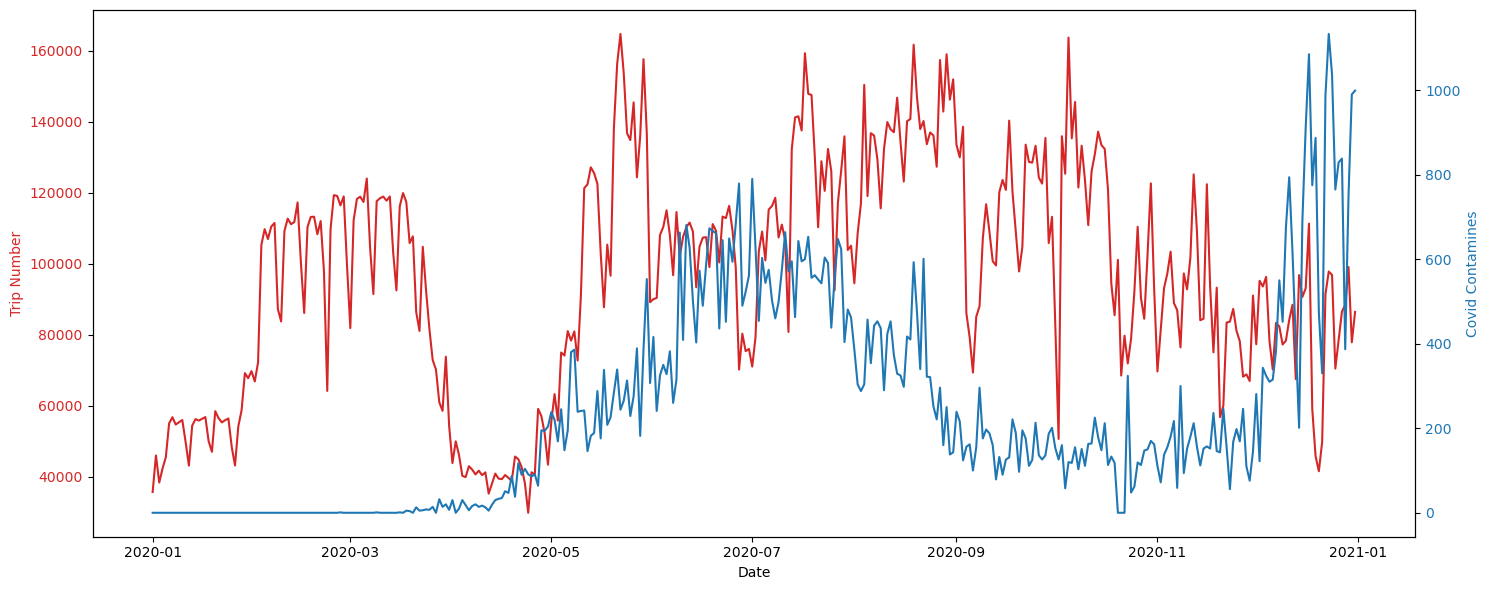

In [20]:
# plot the number of confirmed cases total covid contamines for each date date should be from earliest to latest
# sum the number of confirmed cases for each date
# show all date clearly on the x-axis without overlapping
# order the x-axis by date (from the earliest to the latest)

group_df = node_df.groupby('date')[['covid_contamines','trip_num', 'inner_trip_num', 'outer_trip_num']].sum()
# order the x-axis by date (from the earliest to the latest)
group_df.index = pd.to_datetime(group_df.index)
group_df = group_df.sort_index()
# plot trip number and covid contamines
# make the figure size 15x6
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Trip Number', color=color)
ax1.plot(group_df.index, group_df['trip_num'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Covid Contamines', color=color)
ax2.plot(group_df.index, group_df['covid_contamines'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()






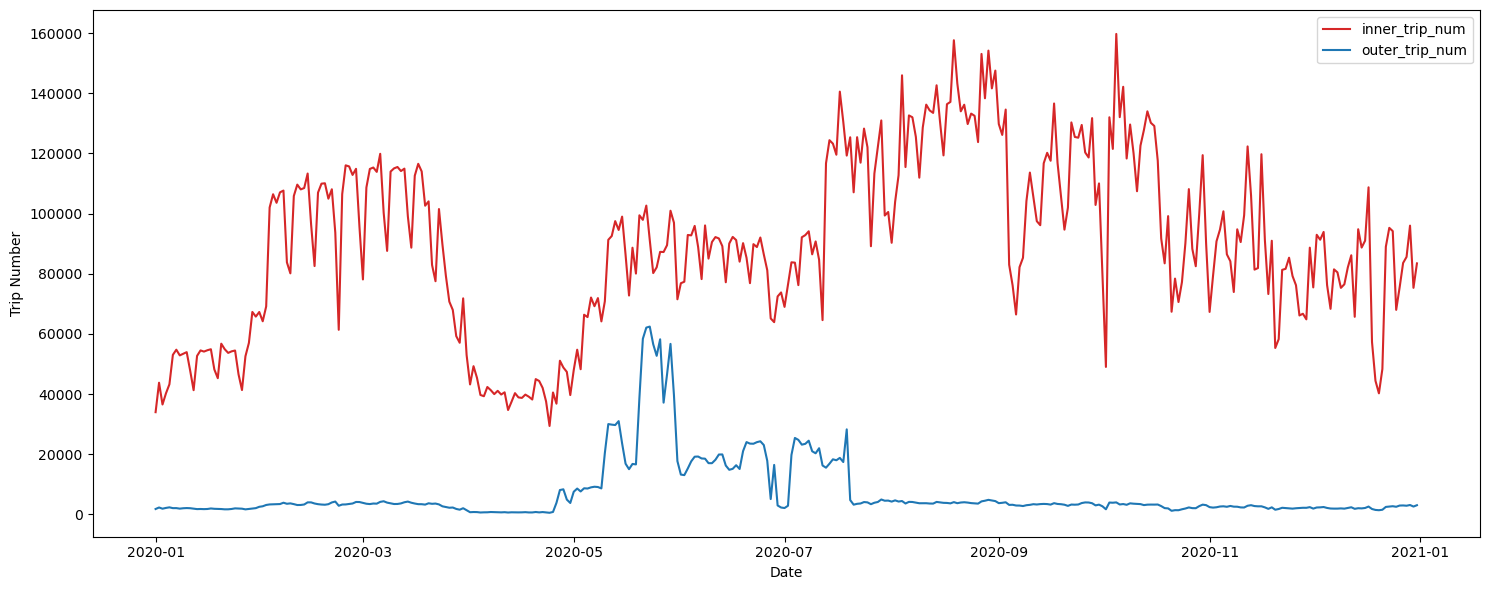

In [21]:
# plot inner_trip_num and outer_trip_num in node_df by date
# make the figure size 15x6 # two lines in one plot using different colors but share the same y-axis and x-axis
fig, ax1 = plt.subplots(figsize=(15,6))
color = ['tab:red', 'tab:blue']
ax1.set_xlabel('Date')
ax1.set_ylabel('Trip Number')
ax1.plot(group_df.index, group_df['inner_trip_num'], color=color[0], label='inner_trip_num')
ax1.plot(group_df.index, group_df['outer_trip_num'], color=color[1], label='outer_trip_num')
ax1.legend()
fig.tight_layout()
plt.show()



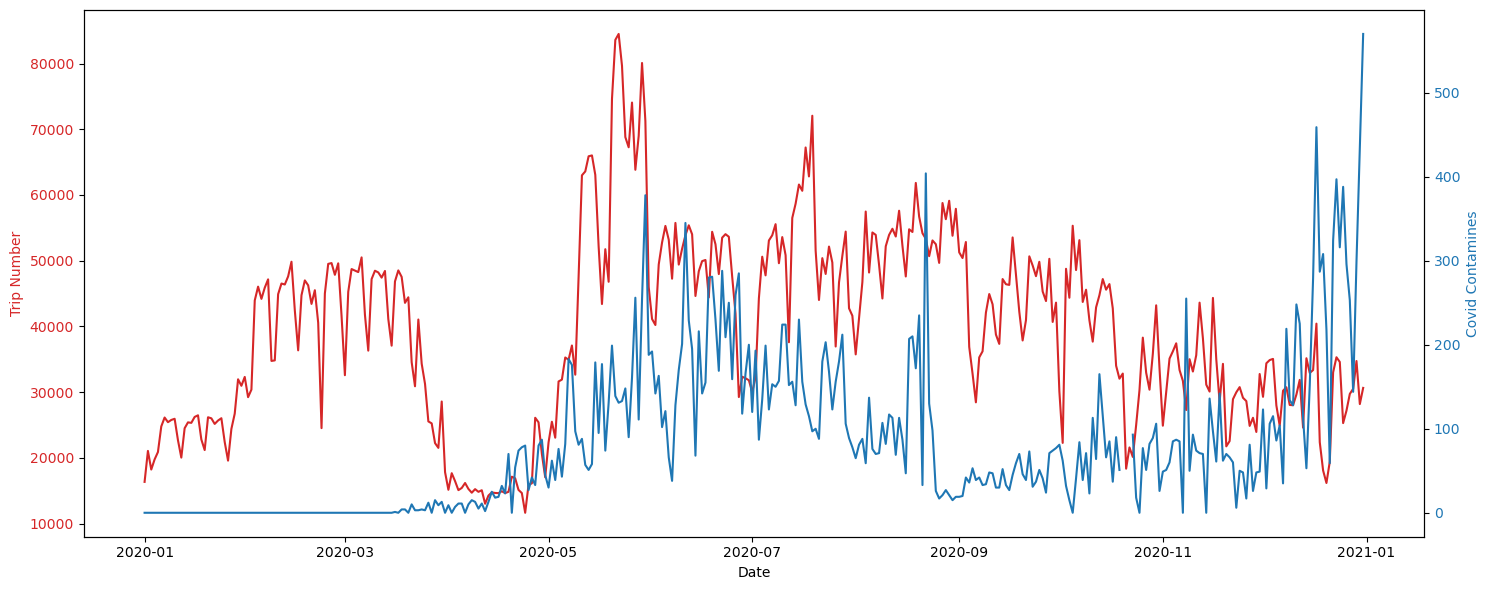

In [22]:
# only plot the number of confirmed cases of the region 'Lagos'
lagos_df = node_df[node_df['node_name'] == 'Lagos']
lagos_df.index = pd.to_datetime(lagos_df['date'])
# plot the number of confirmed cases and trip number for each date
# make the figure size 15x6
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Trip Number', color=color)
ax1.plot(lagos_df.index, lagos_df['trip_num'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Covid Contamines', color=color)
ax2.plot(lagos_df.index, lagos_df['covid_contamines'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()




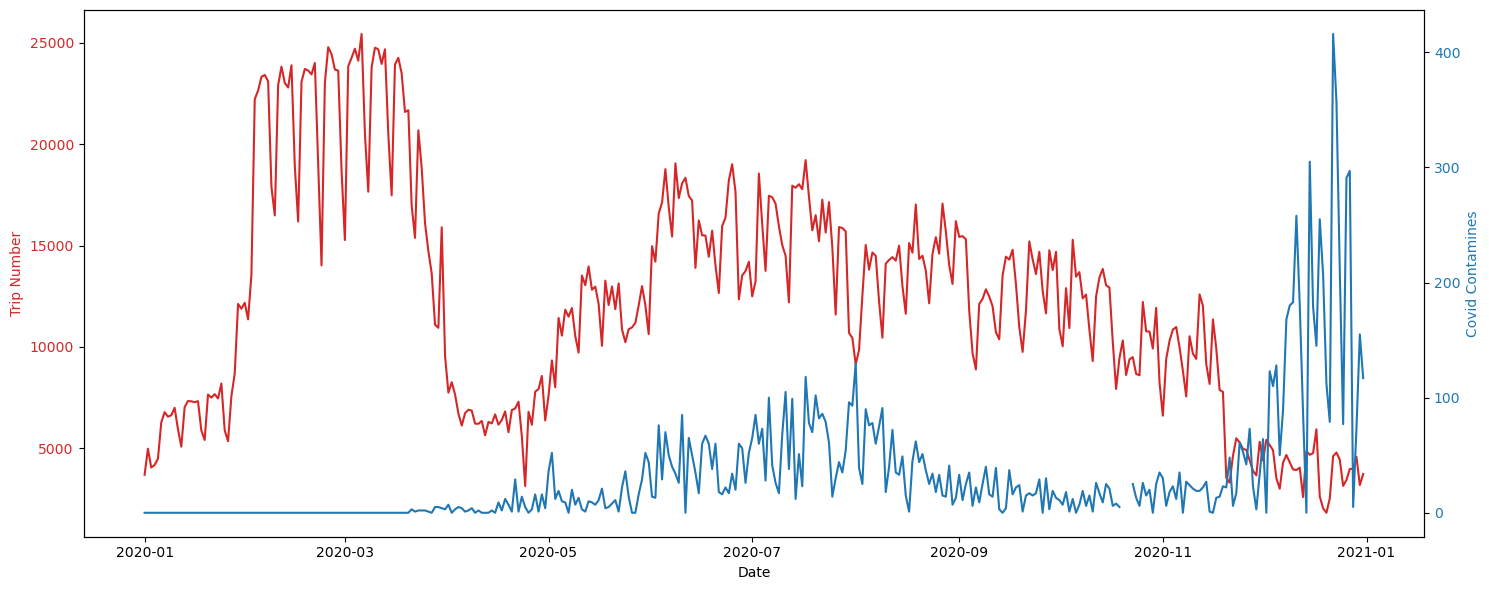

In [23]:
# only plot the number of confirmed cases of the region 'Federal Capital Territory'
fct_df = node_df[node_df['node_name'] == 'Federal Capital Territory']
fct_df.index = pd.to_datetime(fct_df['date'])
# plot the number of confirmed cases and trip number for each date
# make the figure size 15x6
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Trip Number', color=color)
ax1.plot(fct_df.index, fct_df['trip_num'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Covid Contamines', color=color)
ax2.plot(fct_df.index, fct_df['covid_contamines'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()


In [24]:
# save the node_df to 'trip_production_admin1_covid.csv'
node_df.to_csv('trip_production_admin1_covid.csv', index=False)
